<a href="https://colab.research.google.com/github/vodnalasricharan/Ineuron/blob/master/matplotlib_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
import seaborn as sns

#1

In [9]:
'''We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 '''

max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

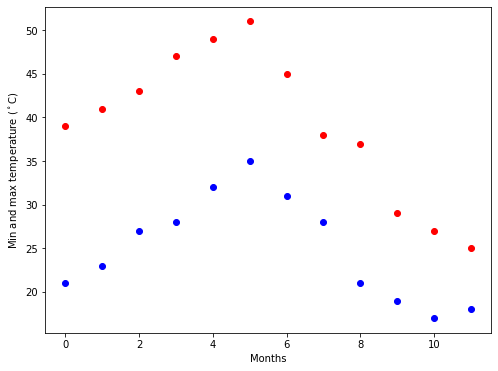

In [19]:
plt.figure(figsize=(8,6))
plt.plot(max,'ro')
plt.plot(min,'bo')
plt.xlabel('Months')
plt.ylabel('Min and max temperature ($^\circ$C)')
plt.show()

In [15]:
'''
1.Fitting to Data
'''
months = np.arange(12)
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min, [-40, 20, 0])

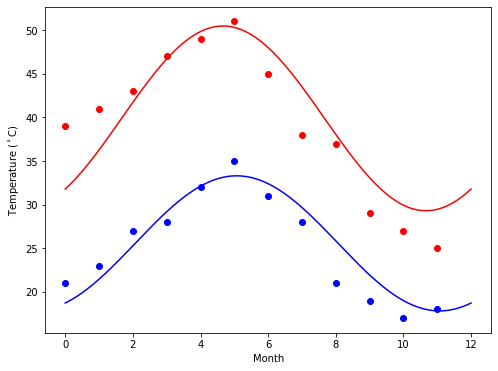

In [16]:
'''
2.Plot Fit
'''
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(months, max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#2

In [22]:
'''
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
'''
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)


In [24]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##pie chart

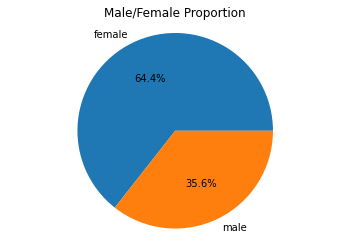

In [45]:
#improper way

plt.pie(titanic['sex'].astype('category').value_counts(),labels=titanic['sex'].unique()[:-1],autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.axis('equal')
plt.show()

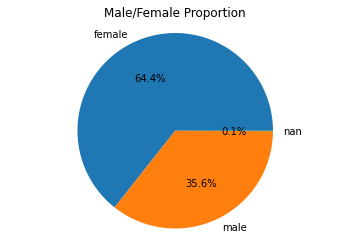

In [44]:
#Proper way
gender = titanic['sex'].astype('category')
gender = gender.cat.codes
plt.pie(gender.value_counts(), labels = titanic['sex'].unique(), autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.axis('equal')
plt.show()


##scatter plot

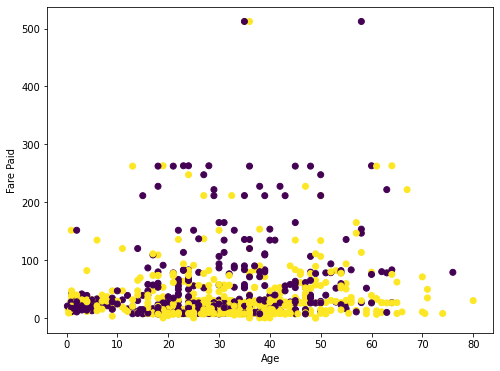

In [62]:
#2 question using matplotlib
plt.figure(figsize=(8,6))
plt.scatter(titanic['age'], titanic['fare'], c = gender)
plt.xlabel("Age")
plt.ylabel("Fare Paid")
plt.show()

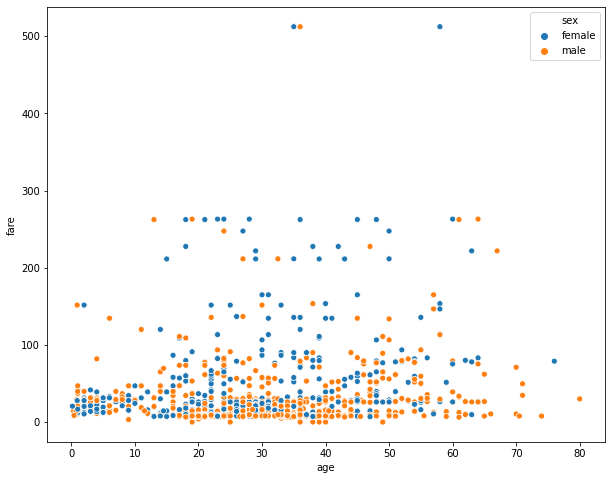

In [64]:
#2 question using seaborn
plt.figure(figsize=(10,8))
sns.scatterplot(x='age',y='fare',data=titanic,hue='sex')